In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/telco_churn.csv')  # adjust path if needed

# Basic overview
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check data types
print("\nData Types:")
print(df.dtypes)

# Quick stats on numeric columns
print("\nSummary Statistics:")
print(df.describe())

# Check unique values in Churn column
print("\nChurn Value Counts:")
print(df['Churn'].value_counts())

#Overall Churn Rate
churn_rate = df['Churn'].value_counts(normalize = True) * 100
print("\nOverall Churn Rate:")
print(churn_rate)


#Average Tenure—
average_tenure = df['tenure'].sum() / df['tenure'].count() 
print("\nAverage Tenure:")
print(average_tenure)



Dataset Shape: (7043, 21)

First 5 Rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Streami


Churn Rate by Contract Type (%):
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


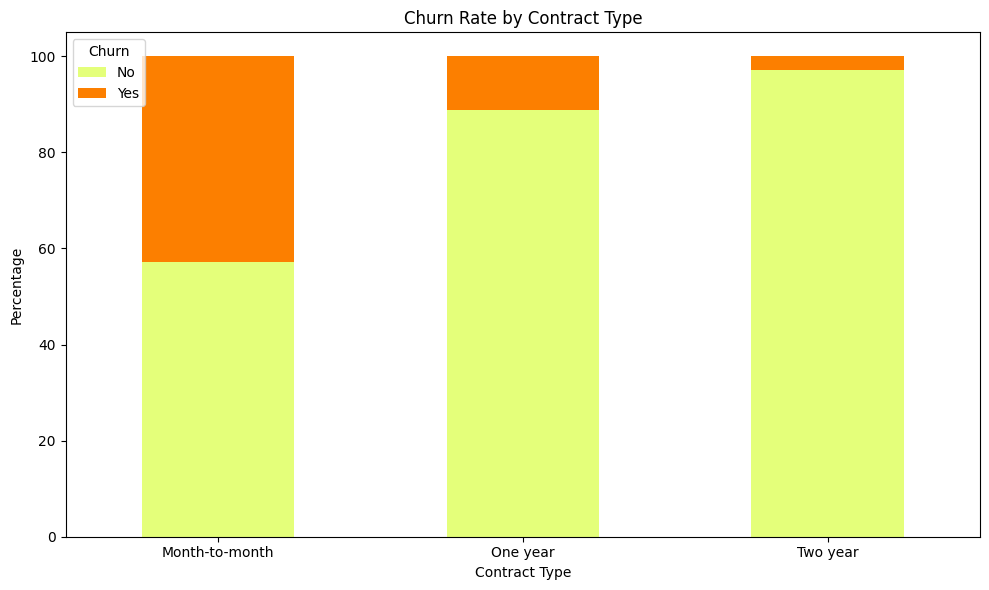

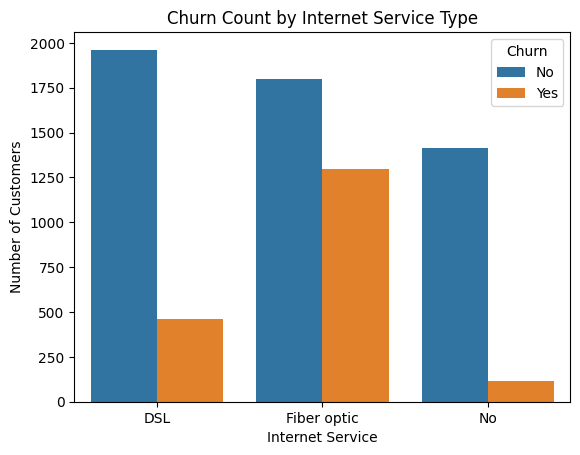

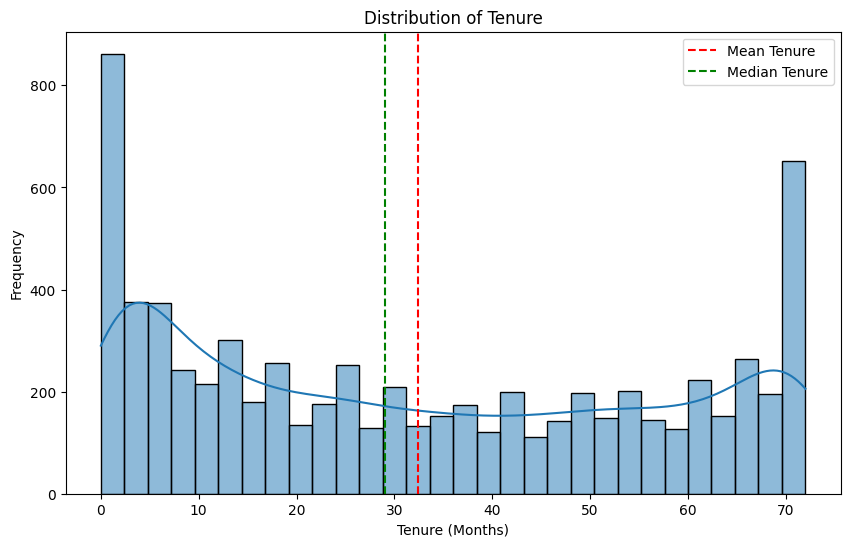

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped table of churn rate by contract
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nChurn Rate by Contract Type (%):")
print(contract_churn)

# Visualize it
contract_churn.plot(kind='bar', stacked=True, colormap = 'Wistia', figsize=(10, 6))
plt.title('Churn Rate by Contract Type')
plt.ylabel('Percentage')
plt.xlabel('Contract Type')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn Count by Internet Service Type')
plt.ylabel('Number of Customers')
plt.xlabel('Internet Service')
plt.show()



# Visualize the distribution of tenure
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.axvline(df['tenure'].mean(), color='red', linestyle='--', label='Mean Tenure')
plt.axvline(df['tenure'].median(), color='green', linestyle='--', label='Median Tenure')
plt.legend()
plt.show()              